# Importing Packages

In [ ]:

from bs4 import BeautifulSoup
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns


# Getting & Cleaning the Data

In [ ]:
# Here we will create our list with the numbers from the href
page = requests.get("https://www.imdb.com/search/title/?genres=war&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=5aab685f-35eb-40f3-95f7-c53f09d542c3&pf_rd_r=0BQ0DM8ZN5ZC0VP4BCZZ&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_20")
soup_href = BeautifulSoup(page.content, 'html.parser')

for i in range(0,101):
    href = soup_href.find_all(class_="lister-item-index unbold text-primary", href=True)
    for i in href:
        x = href.get_text()
        print(x)
# This cell is just for production purpose to have the numbers to check the function below
imdb = pd.read_csv("/work/FeatureFilmRatingCou.csv")
get_list = imdb['Field1_Link'].tolist()
tt_numbers = []

for i in get_list:
    tt_numbers.append(re.sub('\D', '', i))

filming_dates= []
for i in tt_numbers:
    page = requests.get("https://www.imdb.com/title/tt{}/locations?ref_=tt_dt_dt".format(i))
    soup = BeautifulSoup(page.content, 'html.parser')
    x = soup.find('li', {'class': "ipl-zebra-list__item"})
    try:
        filming_dates.append(x.get_text().replace('\n', '').strip())
    except:
        filming_dates.append('No Dates available')

#print(filming_dates)
df1 = pd.DataFrame(filming_dates, columns=['Filming Dates'])

In [ ]:
# Ret
Fdates = pd.read_csv("fdates.csv")

In [ ]:
x = pd.read_csv("FeatureFilmRatingCou.csv")

In [ ]:
x

In [ ]:
War = pd.concat([x,Fdates],axis=1)

In [ ]:
War.keys()

Index(['Title', 'Field1_Link', 'Year', 'Duration', 'Genre', 'Rating',
       'Description', 'Director', 'Field5_Link', 'Field5', 'Unnamed: 0',
       'Filming Dates'],
      dtype='object')

In [ ]:
War = War.drop([ 'Field1_Link', 'Field5_Link','Unnamed: 0'],axis=1)

In [ ]:
War

In [ ]:
War['Field5'] = War['Field5'].str.split(":").str[-1]

In [ ]:
War['Duration'] = War['Duration'].str.split(" ").str[0]

In [ ]:
War= War.rename({'Field5': 'Stars'}, axis=1) 


In [ ]:
War.head()

,Title,Year,Duration,Genre,Rating,Description,Director,Stars,Filming Dates
0,The Mountain II,(2016),135,"Action, Drama, War",8.8,In a desolate war zone where screams of the in...,Alper Caglar,"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",No Dates available
1,Saving Private Ryan,(1998),169,"Drama, War",8.6,"Following the Normandy Landings, a group of U....",Steven Spielberg,"Tom Hanks, Matt Damon, Tom Sizemore, Edward Burns",27 June 1997 - 13 September 1997
2,Life Is Beautiful,(1997),116,"Comedy, Drama, Romance",8.6,When an open-minded Jewish librarian and his s...,Roberto Benigni,"Roberto Benigni, Nicoletta Braschi, Giorgio Ca...",June 1997 - 5 September 1997
3,The Pianist,(2002),150,"Biography, Drama, Music",8.5,A Polish Jewish musician struggles to survive ...,Roman Polanski,"Adrien Brody, Thomas Kretschmann, Frank Finlay...",19 February 2001 - July 2001
4,Grave of the Fireflies,(1988),89,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,Isao Takahata,"Tsutomu Tatsumi, Ayano Shiraishi, Akemi Yamagu...",No Dates available


# Normalizing Data


In [ ]:
normalized_Ratings_series=(War["Rating"]-War["Rating"].min())/(War["Rating"].max()-War["Rating"].min())
normalized_ratings=pd.DataFrame(normalized_Ratings_series)
normalized_ratings

,Rating
0,1.000000
1,0.846154
2,0.846154
3,0.769231
4,0.769231
...,...
95,0.076923
96,0.076923
97,0.000000
98,0.000000


# Graphs


In [ ]:
Y = War.sort_values(['Year'], ascending=True)

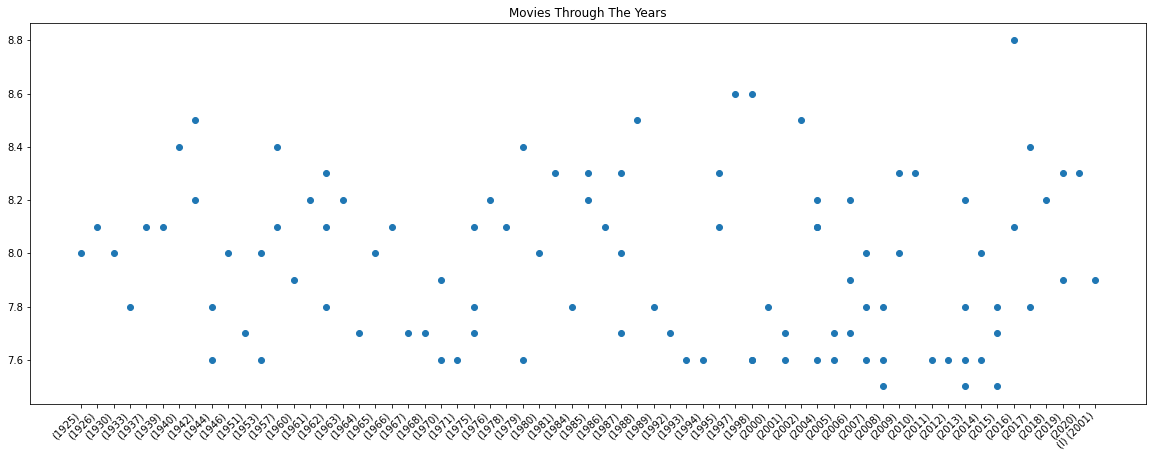

In [ ]:
# Movies' Rating by Year.


plt.figure(figsize=(20,7))
plt.xticks(rotation=45, ha='right')
plt.scatter(Y['Year'],Y['Rating'])
plt.title("Movies Through The Years")
plt.show()

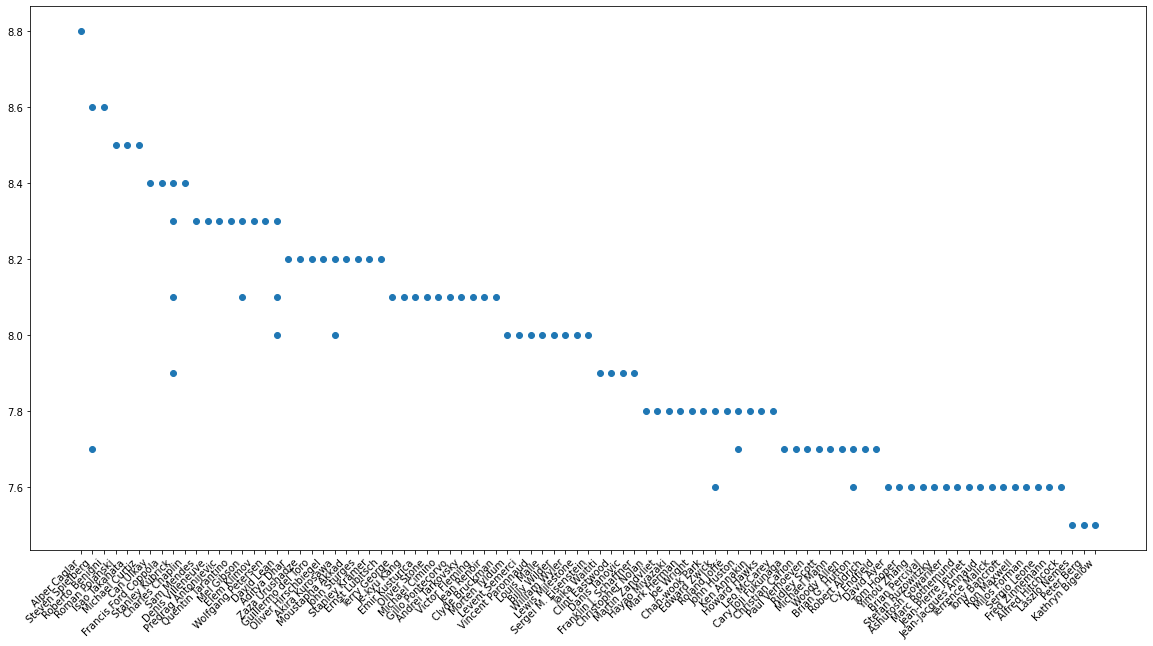

In [ ]:
# Number Movies' in top 100 by Director.


plt.figure(figsize=(20,10))
plt.xticks(rotation=45, ha='right')
plt.scatter(War['Director'],War['Rating'])

plt.show()

In [ ]:
 War.sort_values(['Duration'], ascending=True)

,Title,Year,Duration,Genre,Rating,Description,Director,Field5,Filming Dates
57,Land of Mine,(2015),100,"Drama, History, War",7.8,"In post-World War II Denmark, a group of young...",Martin Zandvliet,"Roland Møller, Louis Hofmann, Joel Basman, Mik...",July 2014 - August 2014
66,To Have and Have Not,(1944),100,"Adventure, Comedy, Film-Noir",7.8,"During World War II, American expatriate Harry...",Howard Hawks,"Humphrey Bogart, Lauren Bacall, Walter Brennan...",29 February 1944 - 10 May 1944
5,Casablanca,(1942),102,"Drama, Romance, War",8.5,A cynical expatriate American cafe owner strug...,Michael Curtiz,"Humphrey Bogart, Ingrid Bergman, Paul Henreid,...",25 May 1942 - 3 August 1942
44,Au Revoir les Enfants,(1987),104,"Drama, War",8.0,A French boarding school run by priests seems ...,Louis Malle,"Gaspard Manesse, Raphael Fejtö, Francine Racet...",2 February 1987
78,The African Queen,(1951),105,"Adventure, Drama, Romance",7.7,"In WWI Africa, a gin-swilling riverboat captai...",John Huston,"Humphrey Bogart, Katharine Hepburn, Robert Mor...",May 1951 - August 1951
...,...,...,...,...,...,...,...,...,...
96,Lifeboat,(1944),97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,"Tallulah Bankhead, John Hodiak, Walter Slezak,...",3 August 1943 - 17 November 1943
53,No Man's Land,(I) (2001),98,"Comedy, Drama, War",7.9,Bosnia and Herzegovina during 1993 at the time...,Danis Tanovic,"Branko Djuric, Rene Bitorajac, Filip Sovagovic...",No Dates available
27,To Be or Not to Be,(1942),99,"Comedy, War",8.2,"During the Nazi occupation of Poland, an actin...",Ernst Lubitsch,"Carole Lombard, Jack Benny, Robert Stack, Feli...",6 November 1941 - 24 December 1941
83,The Counterfeiters,(2007),99,"Crime, Drama, History",7.6,"The story of the Operation Bernhard, the large...",Stefan Ruzowitzky,"Karl Markovics, August Diehl, Devid Striesow, ...",21 March 2006 - 4 May 2006


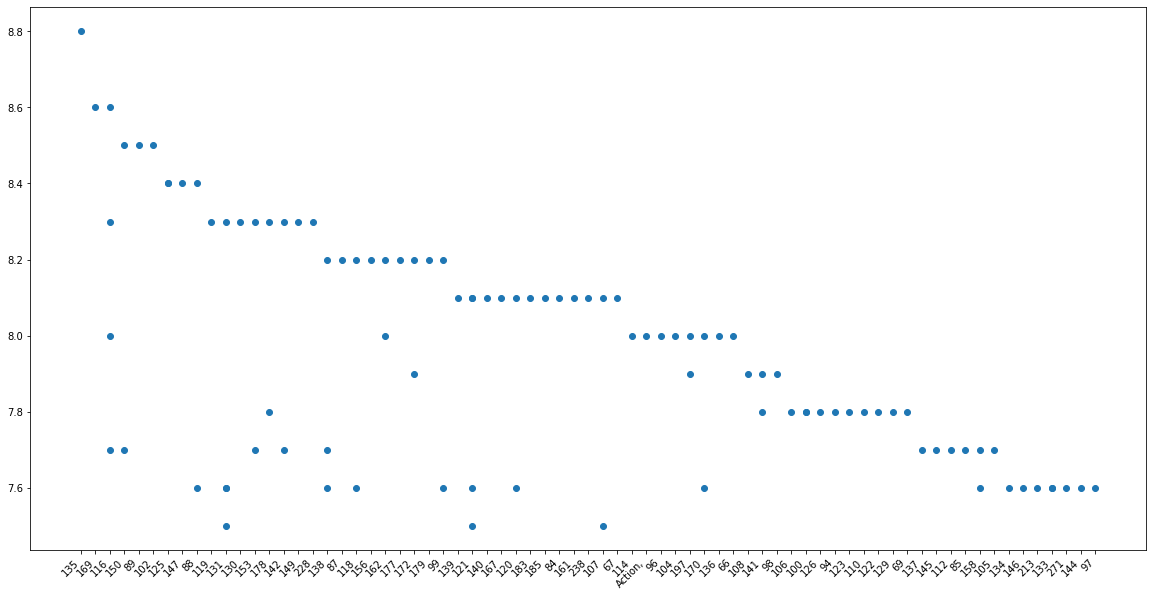

In [ ]:
ax=plt.figure(figsize=(20,10))
ax= plt.xticks(rotation=45, ha='right')
ax= plt.scatter(War['Duration'],War['Rating'])
ax.setxticks
plt.show()

In [ ]:
War.describe()

,Rating
count,100.000000
mean,7.960000
std,0.302181
min,7.500000
25%,7.700000
50%,8.000000
75%,8.200000
max,8.800000


In [ ]:
War['Duration'].value_counts()

116    4
131    4
121    4
138    3
99     2
      ..
106    1
167    1
108    1
67     1
102    1
Name: Duration, Length: 71, dtype: int64

In [ ]:
Top10 = War.sort_values(['Rating'], ascending=False).head(10)

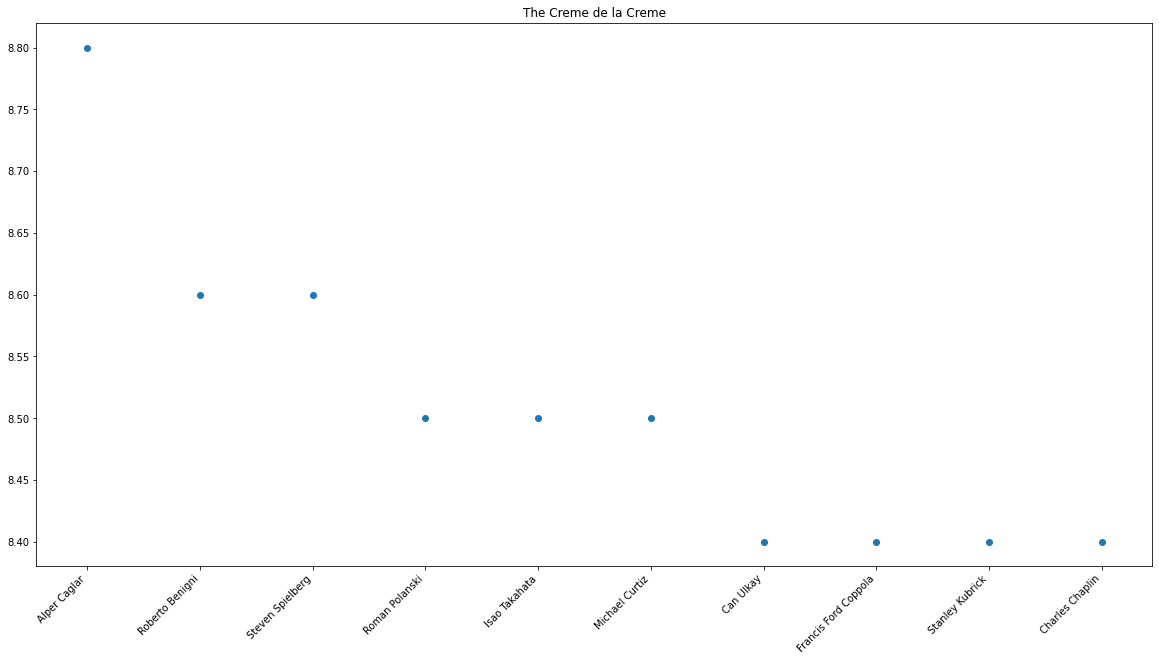

In [ ]:

plt.figure(figsize=(20,10))
plt.xticks(rotation=45, ha='right')
plt.scatter(Top10['Director'],Top10['Rating'])
plt.title('The Creme de la Creme')
plt.show()

In [ ]:
plt.figure(figsize=(30,20))
t = War.groupby(['Director']).count()
t = 

,Title,Year,Duration,Genre,Rating,Description,Field5,Filming Dates
Director,,,,,,,,
Aditya Dhar,1,1,1,1,1,1,1,1
Akira Kurosawa,2,2,2,2,2,2,2,2
Alfred Hitchcock,1,1,1,1,1,1,1,1
Alper Caglar,1,1,1,1,1,1,1,1
Andrei Tarkovsky,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
William Wyler,1,1,1,1,1,1,1,1
Wolfgang Petersen,1,1,1,1,1,1,1,1
Woody Allen,1,1,1,1,1,1,1,1


<Figure size 2160x1440 with 0 Axes>

In [ ]:
T= t.sort_values(['Rating'], ascending=False).head(10)

Text(0.5, 1.0, 'Number of Movies by Directors in Top 100')

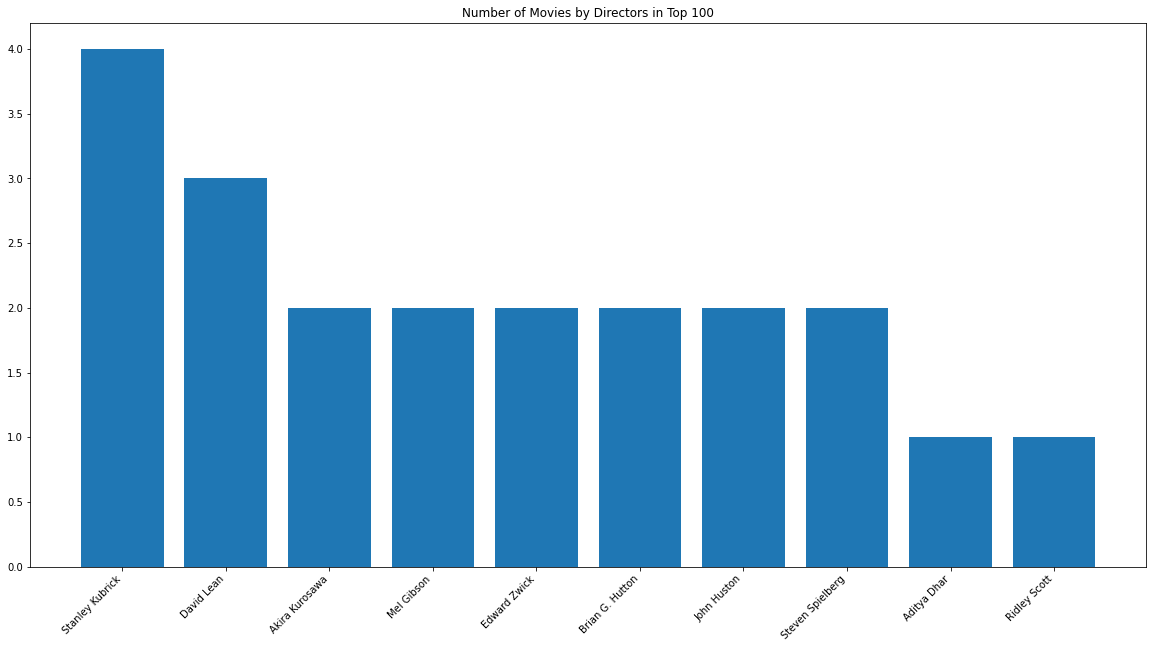

In [ ]:

plt.figure(figsize=(20,10))
plt.xticks(rotation=45, ha='right')
plt.bar(T.index,T["Rating"])
plt.title("Number of Movies by Directors in Top 100")

In [ ]:
T_= t.sort_values(['Rating','Director'], ascending=True).head(10)

In [ ]:
T_

,Title,Year,Duration,Genre,Rating,Description,Field5,Filming Dates
Director,,,,,,,,
Aditya Dhar,1,1,1,1,1,1,1,1
Alfred Hitchcock,1,1,1,1,1,1,1,1
Alper Caglar,1,1,1,1,1,1,1,1
Andrei Tarkovsky,1,1,1,1,1,1,1,1
Ashutosh Gowariker,1,1,1,1,1,1,1,1
Billy Wilder,1,1,1,1,1,1,1,1
Brian Percival,1,1,1,1,1,1,1,1
Can Ulkay,1,1,1,1,1,1,1,1
Cary Joji Fukunaga,1,1,1,1,1,1,1,1


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=86193761-2877-467f-bcb9-1f0b66feed89' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>